In [25]:
# Se cargan las bibliotecas de pandas, numpy y matplotlib
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import matplotlib. pyplot as plt

#bibliotecas extra para tests especificos 
from scipy import stats
from scipy.stats import anderson, normaltest, probplot, t
#from outliers import smirnov_grubbs as grubbs
import time

print("Bibliotecas importadas correctamente")

Bibliotecas importadas correctamente


In [26]:
#Lectura de los datos de excel 
datos = pd.read_excel('Dataset.xlsx')
BPM = datos ['BPM']
tiempo = datos ['Tiempo(s)']

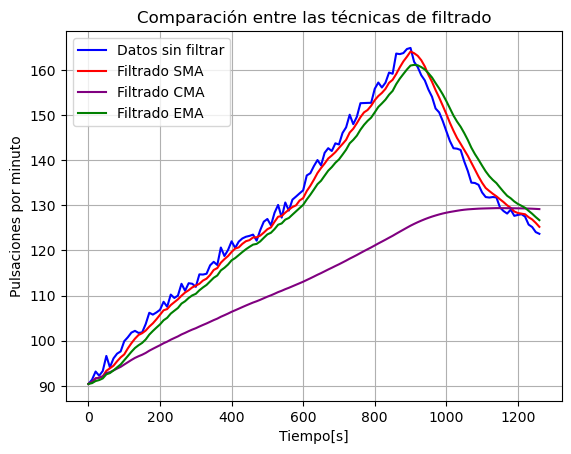

In [27]:
#Basado en https://towardsdatascience.com/moving-averages-in-python-16170e20f6c/

#Metodo 1: Simple moving average (SMA)
SMA = BPM.rolling(5, min_periods=1).mean()

#Metodo 2: Cumulative moving average (CMA)
CMA = BPM.expanding(min_periods=1).mean()

#Metodo 3: Exponential moving average (EMA)
EMA = BPM.ewm(span=10, adjust=False).mean()


plt.figure()
plt.plot(tiempo, BPM, color='blue', label='Data 1')
plt.plot(tiempo, SMA, color='red', label='Data 2')
plt.plot(tiempo, CMA, color='purple', label='Data 3')
plt.plot(tiempo, EMA, color='green', label='Data 4')
##plt.plot(tiempo, ppm_filtrado2, color='green', label='Data 2')
plt.xlabel('Tiempo[s]')
plt.ylabel('Pulsaciones por minuto')
plt.title('Comparación entre las técnicas de filtrado')
plt.legend(['Datos sin filtrar','Filtrado SMA','Filtrado CMA','Filtrado EMA'])
plt.grid(True)
plt.show()

In [28]:
#Medicion de tiempo promedio de ejecucion para cada metodo de filtrado

# SMA
promedio_SMA=0
for i in range(200):
    inicio= time.time()
    SMA = BPM.rolling(5, min_periods=1).mean()
    fin=time.time()
    
    promedio_SMA += (fin - inicio)
    
promedio_SMA = promedio_SMA/200
print("Tiempo promedio de ejecución del filtro SMA:", promedio_SMA, "segundos")


# CMA
promedio_CMA = 0
for i in range(200):
    inicio = time.time()
    CMA = BPM.expanding(min_periods=1).mean()
    fin = time.time()
    promedio_CMA += (fin - inicio)
    
promedio_CMA /= 200
print("Tiempo promedio de ejecución del filtro CMA:", promedio_CMA, "segundos")

# EMA
promedio_EMA = 0
for i in range(200):
    inicio = time.time()
    EMA = BPM.ewm(span=10, adjust=False).mean()
    fin = time.time()
    promedio_EMA += (fin - inicio)
    
promedio_EMA /= 200
print("Tiempo promedio de ejecución del filtro EMA:", promedio_EMA, "segundos")

Tiempo promedio de ejecución del filtro SMA: 7.96520709991455e-05 segundos
Tiempo promedio de ejecución del filtro CMA: 5.029201507568359e-05 segundos
Tiempo promedio de ejecución del filtro EMA: 5.73122501373291e-05 segundos
